In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from chaosmagpy.model_utils import design_gauss, design_matrix
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from alberte_klara_lib import do_design, plot_map_three, plot_map_one
from alberte_klara_lib import n_int_max, n_ext_max, theta_grid, phi_grid

C:\Users\klara\AppData\Local\Temp\ipykernel_19000\302382727.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data_oersted = "oersted_data\Oersted_vect_rtp_15sec_v1.all"
data = pd.read_csv(data_oersted, comment = '%', sep='\s+')

df = data.copy()
new_headers = ["t", "r", "theta", "phi", "B_r", "B_theta", "B_phi"]
df.columns = new_headers

df.head()


<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\klara\AppData\Local\Temp\ipykernel_19000\1230414389.py:1: SyntaxWarning: invalid escape sequence '\O'
  data_oersted = "oersted_data\Oersted_vect_rtp_15sec_v1.all"
C:\Users\klara\AppData\Local\Temp\ipykernel_19000\1230414389.py:2: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(data_oersted, comment = '%', sep='\s+')


t         r    theta      phi       B_r  B_theta   B_phi
0 -291.573801  7167.631  14.4452  32.3930 -38969.43 -6027.33  829.11
1 -291.573407  7163.910  12.6725  28.0739 -39170.05 -5696.74  270.60
2 -291.573026  7160.282  11.0382  22.6677 -39367.09 -5336.84 -142.70
3 -291.572816  7158.268  10.1842  18.9845 -39477.70 -5130.06 -405.14
4 -291.572632  7156.498   9.4745  15.2448 -39580.40 -4909.45 -634.89

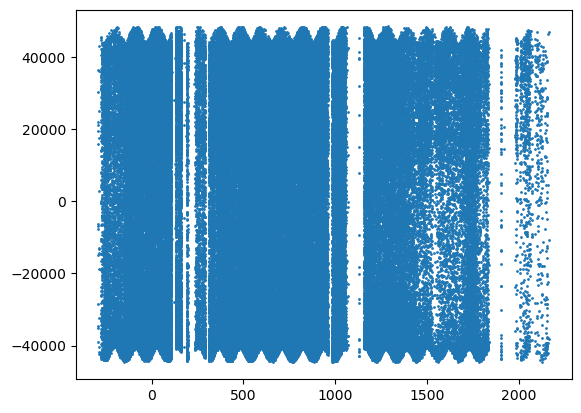

In [4]:
downsampled_df = df.iloc[::30,:]
plt.scatter(downsampled_df['t'], downsampled_df['B_r'], s = 1)

Try first 184 days

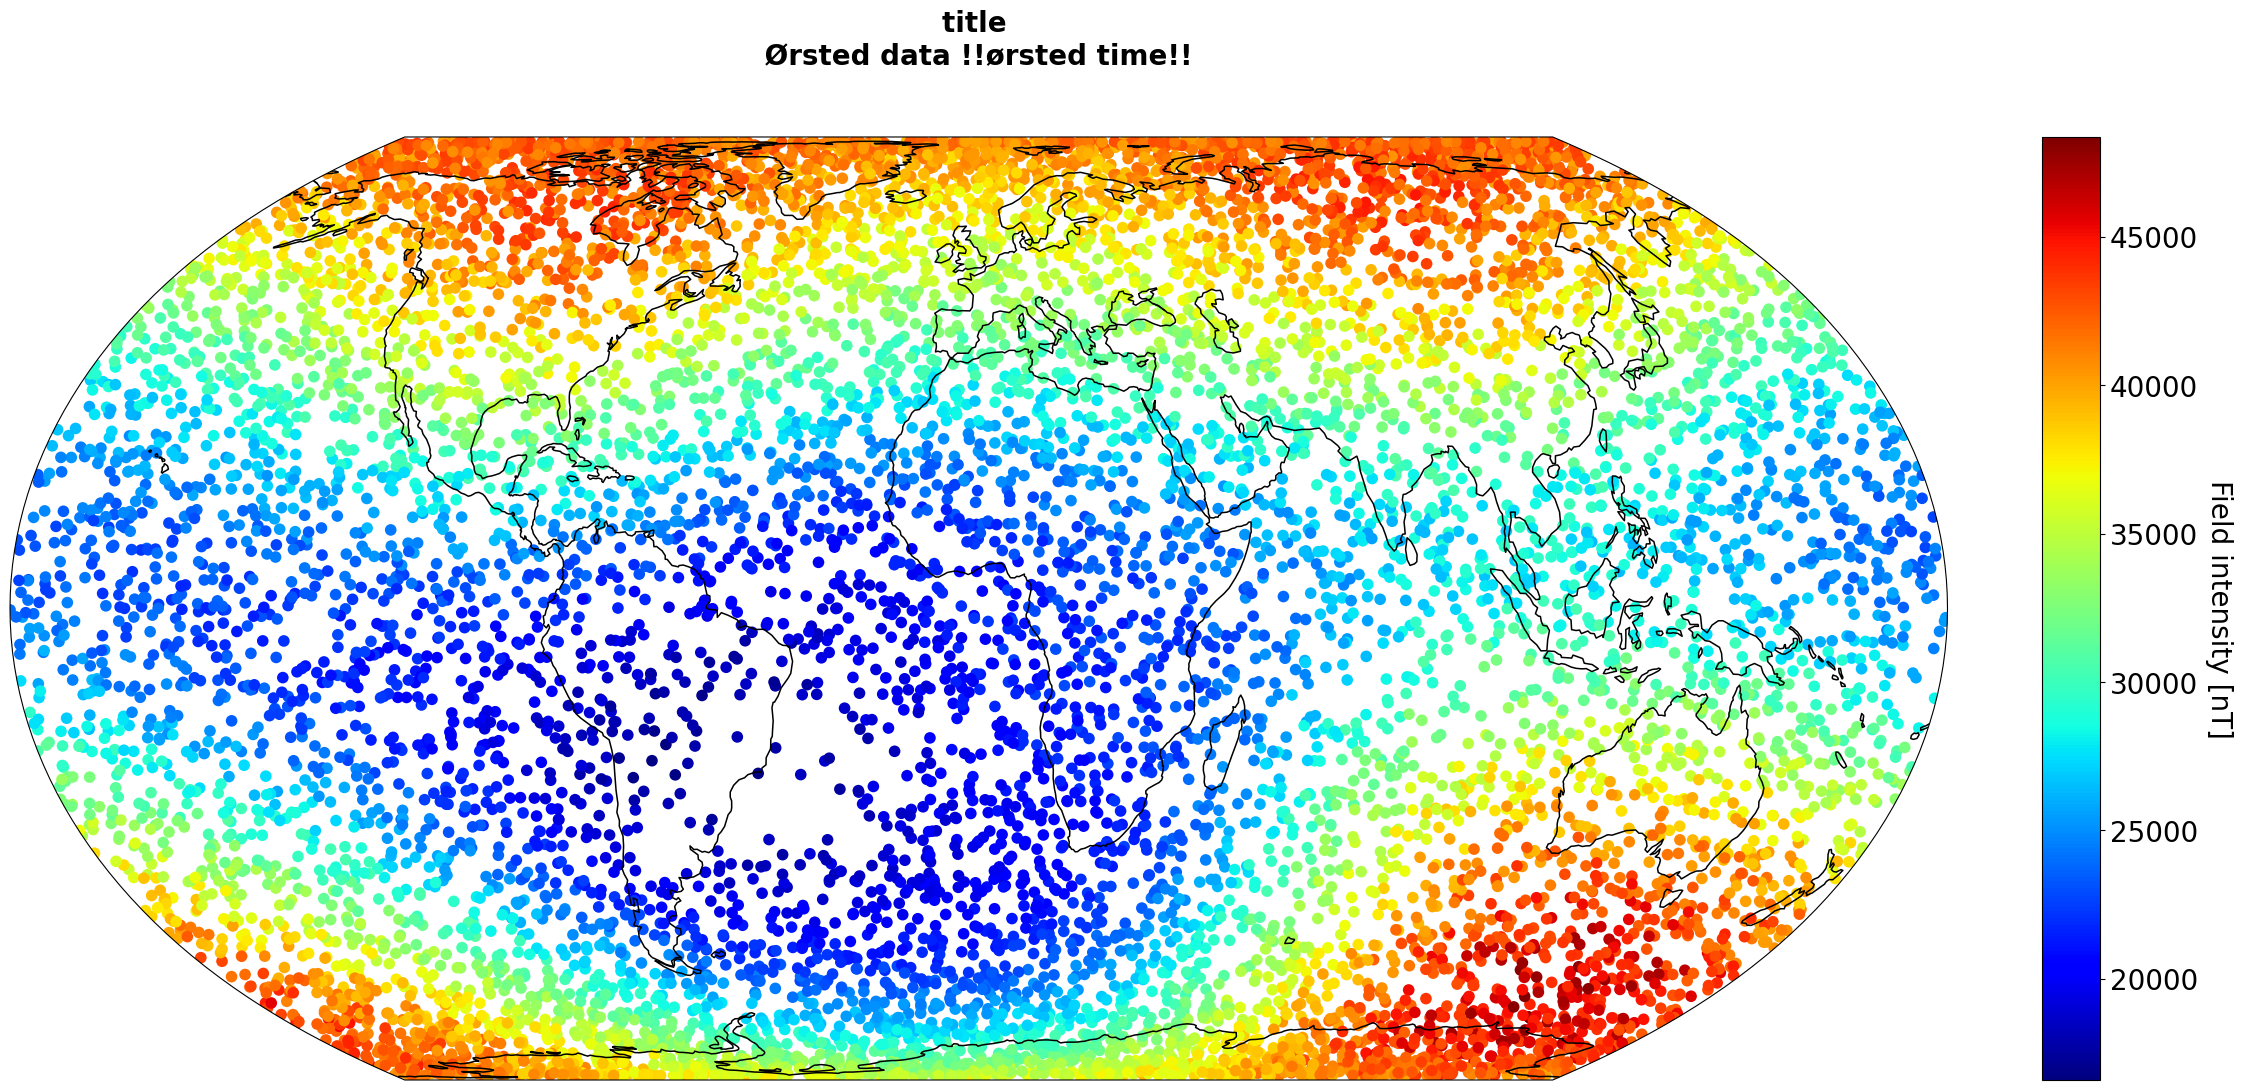

In [5]:
duration = np.ceil(downsampled_df['t'].iloc[0] + 184)
end_time = np.where(np.ceil(downsampled_df['t']) == duration)[0][-1]

udsnit = downsampled_df.iloc[:end_time]
F_udsnit = np.sqrt(udsnit['B_r']**2 + udsnit['B_theta']**2 + udsnit['B_phi']**2)

plot_map_one(F_udsnit, udsnit['phi'], udsnit['theta'], sat = 'Ørsted', title = 'title', label = 'Field intensity [nT]')

Try days 450+184

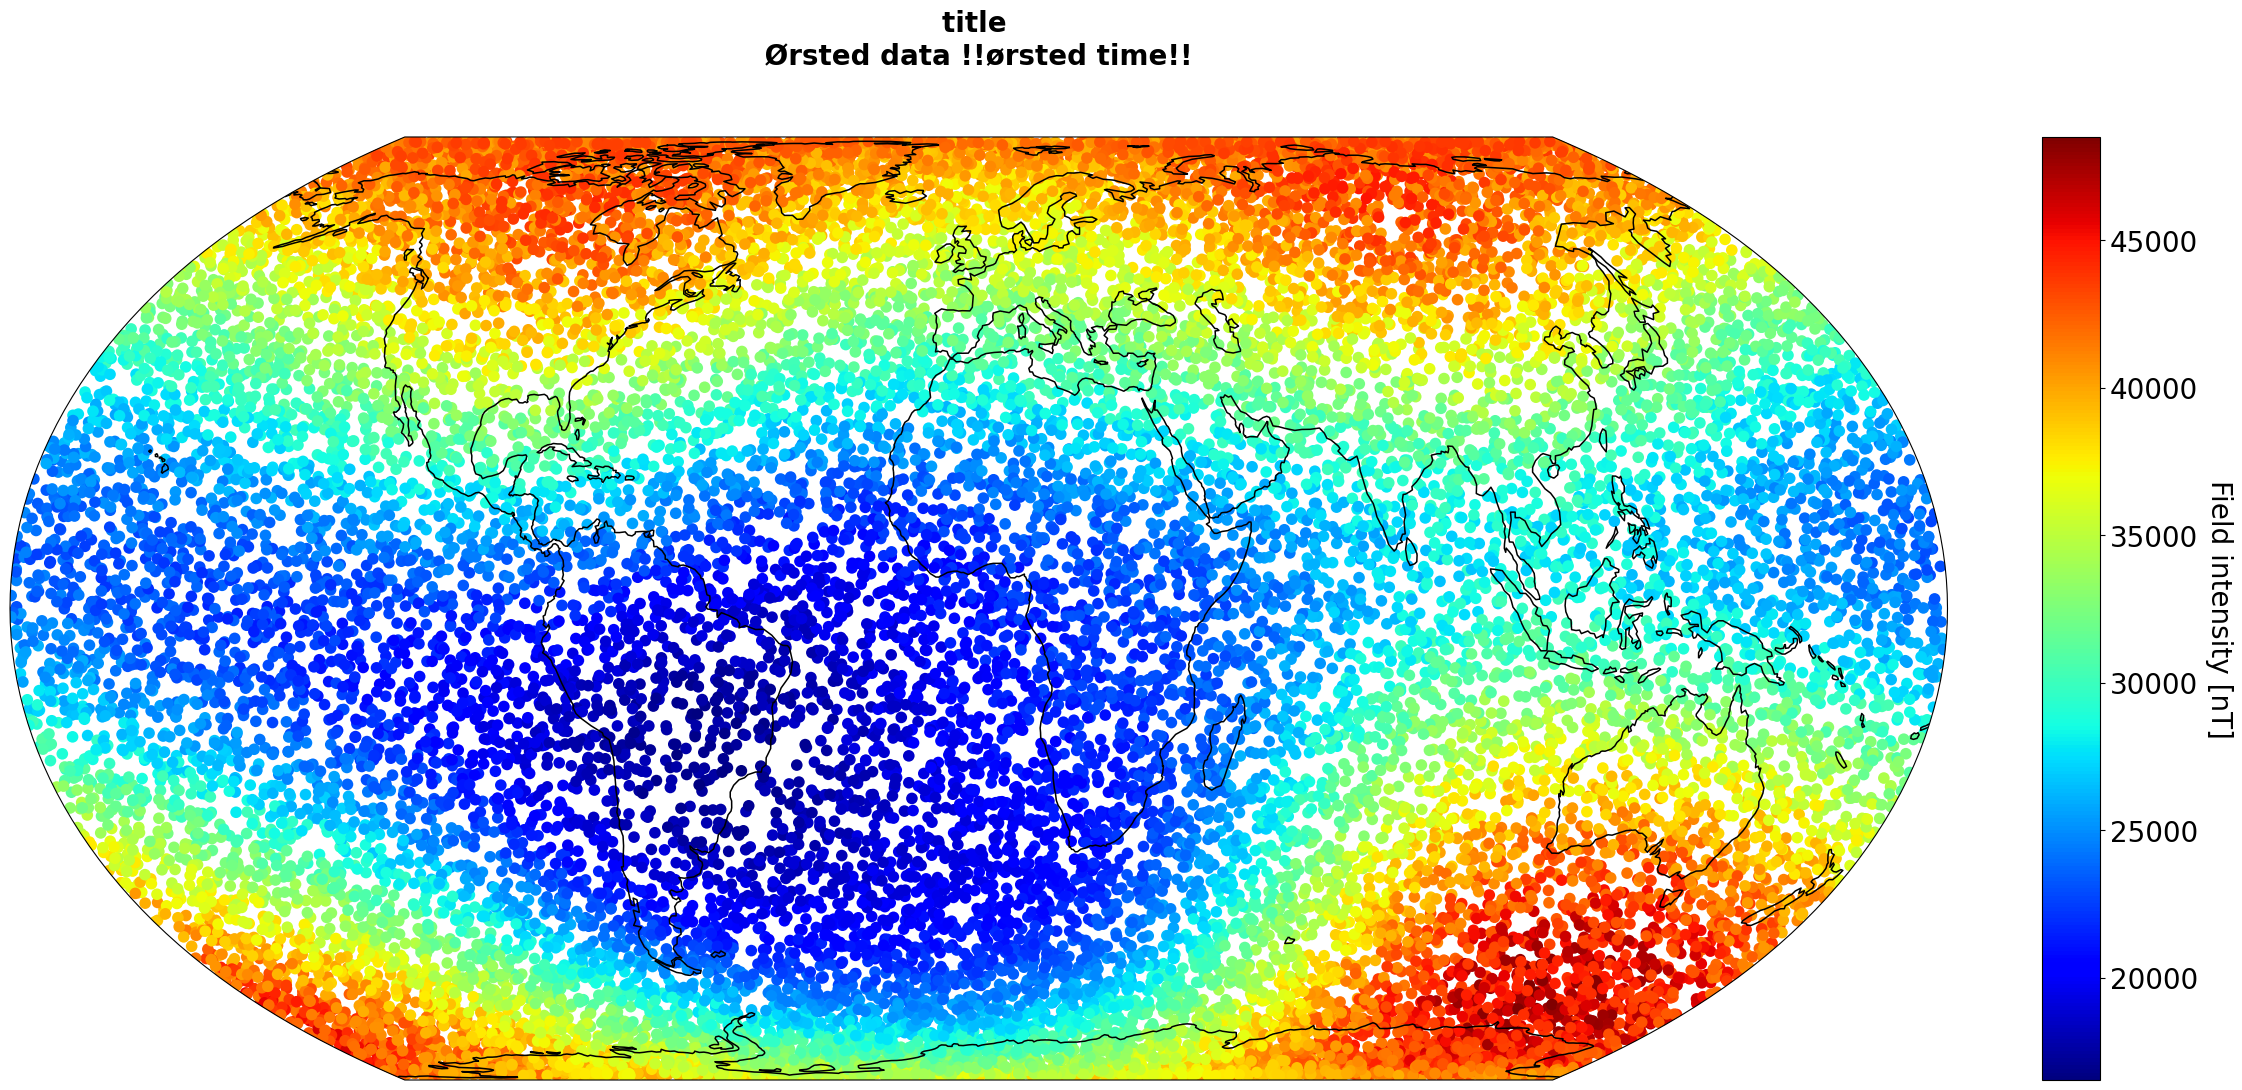

In [16]:
start_time_idx = np.where(np.floor(downsampled_df['t']) == 360)[0][-1]
start_time = downsampled_df['t'].iloc[start_time_idx]
duration = np.ceil(start_time + 184)
end_time_idx = np.where(np.ceil(downsampled_df['t']) == duration)[0][-1]
# bla bla


udsnit = downsampled_df.iloc[start_time_idx:end_time_idx]
F_udsnit = np.sqrt(udsnit['B_r']**2 + udsnit['B_theta']**2 + udsnit['B_phi']**2)

plot_map_one(F_udsnit, udsnit['phi'], udsnit['theta'], sat = 'Ørsted', title = 'title', label = 'Field intensity [nT]')